## 安裝 streamlit

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.4 MB/s eta 0:00:00


In [2]:
!pip install streamlit-drawable-canvas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.7 MB/s eta 0:00:00


## Build Model

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import save_model

# Step 2: Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 3: Define a neural network model
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
        Dense(
            128, activation="relu"
        ),  # Fully connected layer with 128 units and ReLU activation
        Dense(
            10, activation="softmax"
        ),  # Output layer with 10 units (one for each digit) and softmax activation
    ]
)

# Step 4: Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Step 5: Train the model on the training data
model.fit(train_images, train_labels, epochs=5)

# Step 6: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Save the model as an H5 file
model.save("mnist_digit_recognition_model.h5")

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2601 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1125 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0777 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0812 - accuracy: 0.9753
Test accuracy: 97.53%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
%%writefile app.py
import streamlit as st
import streamlit_drawable_canvas as st_canvas
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import cv2

# Load the trained MNIST digit recognition model
model = load_model("mnist_digit_recognition_model.h5")

# Define a function to preprocess and classify the user's drawing
def classify_digit(drawing_image):
    # Resize the image to 28x28 pixels
    # drawing_image = ImageOps.fit(drawing_image, (28, 28), Image.ANTIALIAS)

    # Convert the image to grayscale
    # drawing_image = ImageOps.grayscale(drawing_image)

    # Invert the image (MNIST digits are white on a black background)
    # drawing_image = ImageOps.invert(drawing_image)

    # Convert the image to a NumPy array
    drawing_array = np.array(drawing_image).astype('float')

    # Normalize pixel values to be between 0 and 1
    drawing_array = drawing_array / 255.0
    # return(drawing_array.shape)

    # Reshape the image to match the model's input shape (1, 28, 28)
    # drawing_array = np.reshape(drawing_array, (1, 28, 28, 1))  # Add the channel dimension

    # Reshape the image to match the model's input shape (1, 28, 28)
    drawing_array = np.reshape(drawing_array, (1, 28, 28))

    # Predict the digit using the loaded model
    digit_prediction = model.predict(drawing_array)

    # Get the predicted digit (index of the maximum probability)
    predicted_digit = np.argmax(digit_prediction)

    return predicted_digit

# Streamlit UI elements
st.title("MNIST Digit Recognition")

st.sidebar.markdown("Draw a digit from 0 to 9 on the canvas below:")
canvas = st_canvas.st_canvas(stroke_color='white', width=200, height=200, drawing_mode="freedraw") # 加上stroke_color='white'

if st.button("Classify"):
    # Get the user's drawing and classify it
    user_drawing = cv2.cvtColor(canvas.image_data,cv2.COLOR_RGB2GRAY) # 加上色彩空間轉換
    user_drawing = cv2.resize(user_drawing,(28,28)) # 加上尺寸轉換
    cv2.imwrite('test.jpg',user_drawing)
    user_digit = classify_digit(user_drawing)

    st.write(f"Predicted Digit: {user_digit}")

st.sidebar.text("Note: Click the 'Classify' button after drawing.")

Overwriting app.py


💡 將手寫圖轉換成 mnist 資料集大小

image.png

## Colab 上運行 Streamlit

In [5]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.606s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [18]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

35.221.181.177


In [19]:
!npx localtunnel --port 8501

npx: installed 22 in 1.878s
your url is: https://clean-hornets-learn.loca.lt
^C


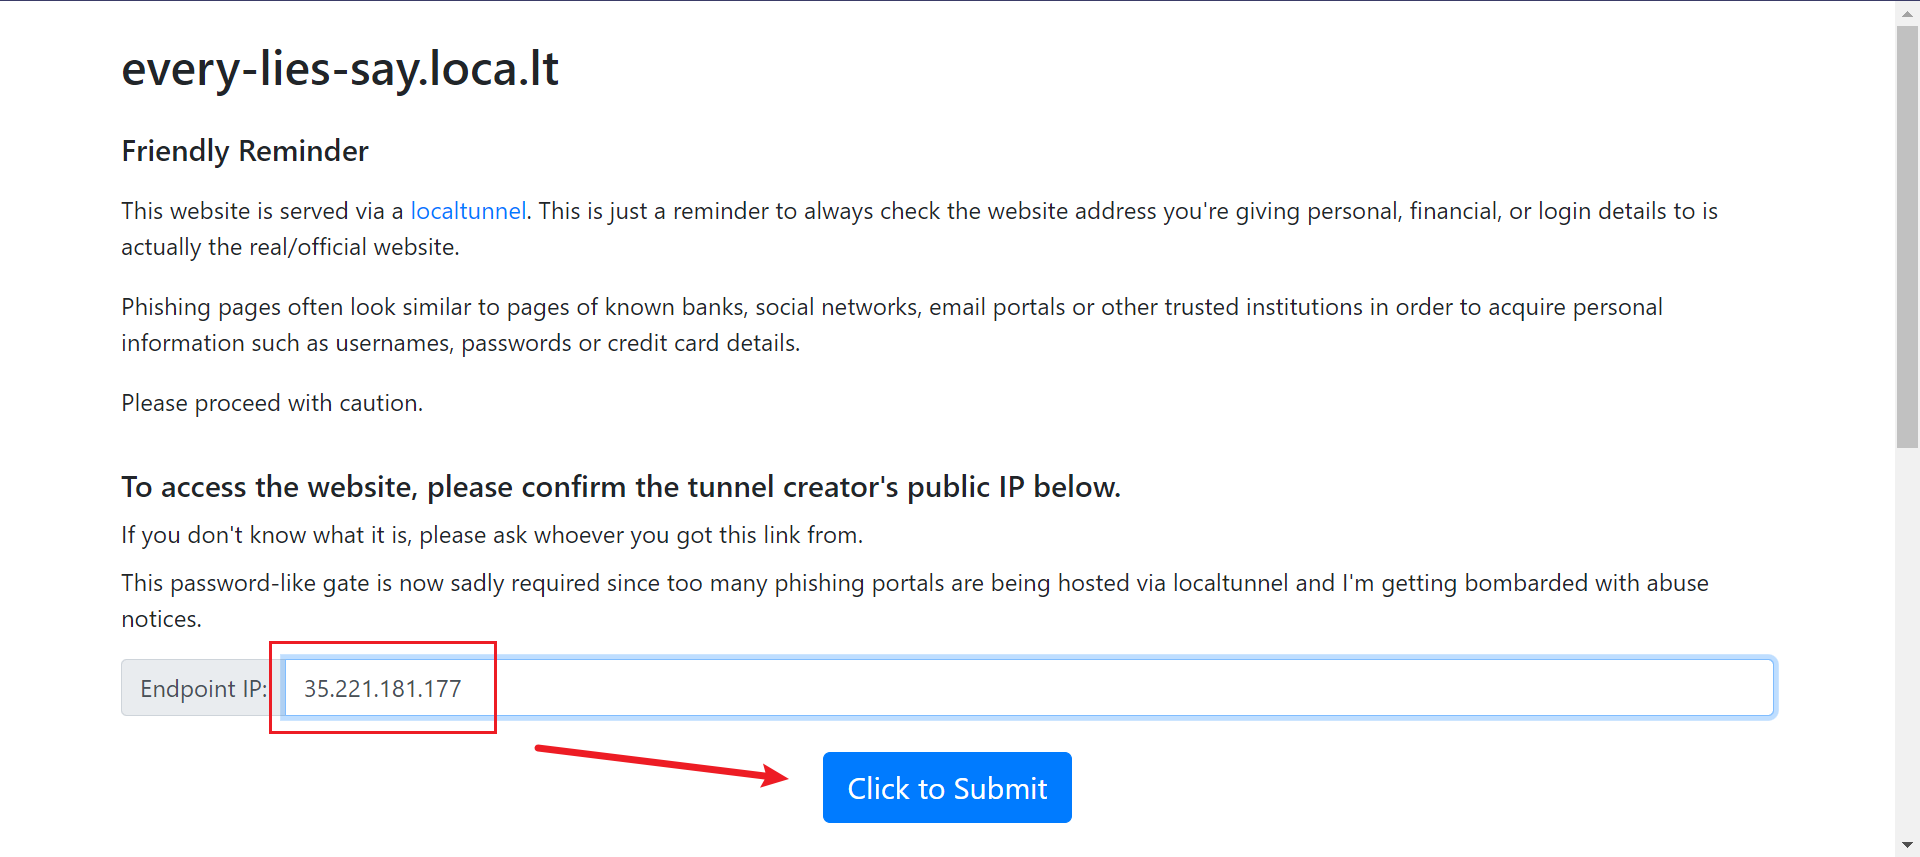

## 輸出結果

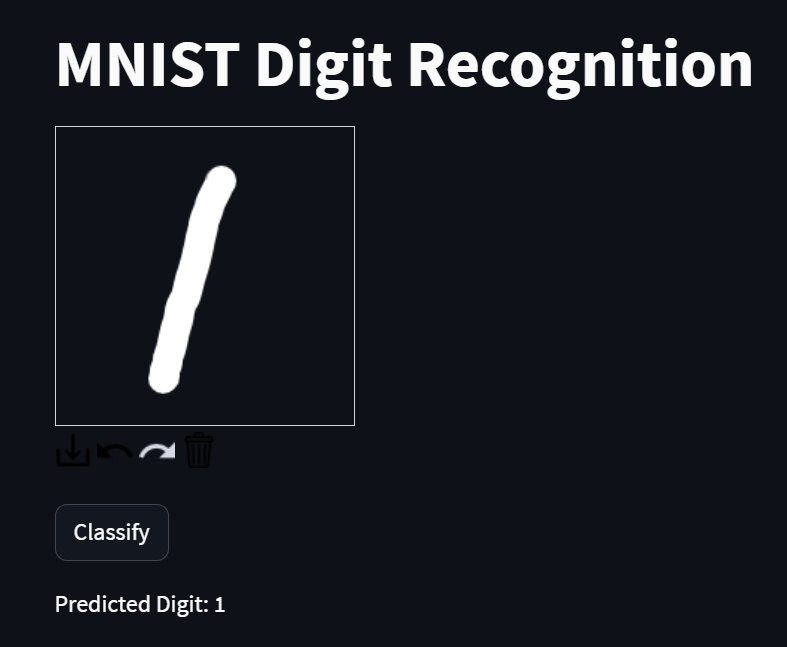

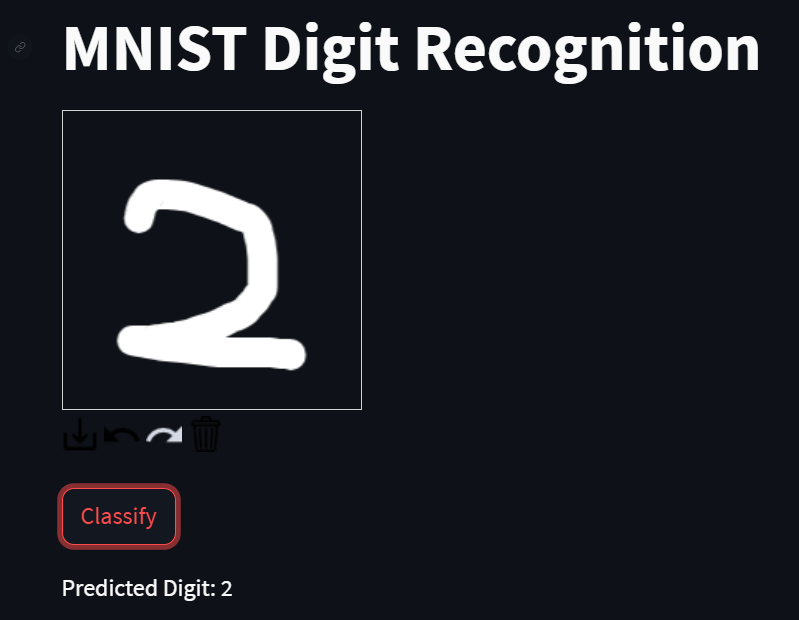

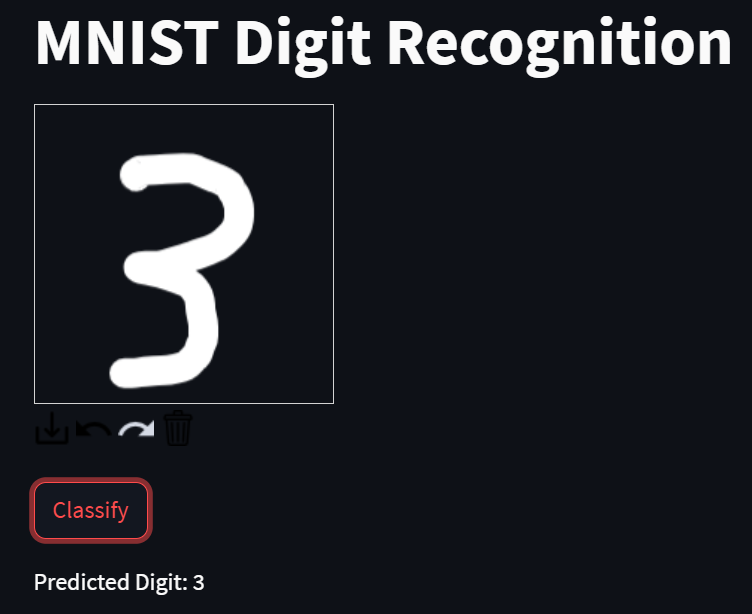

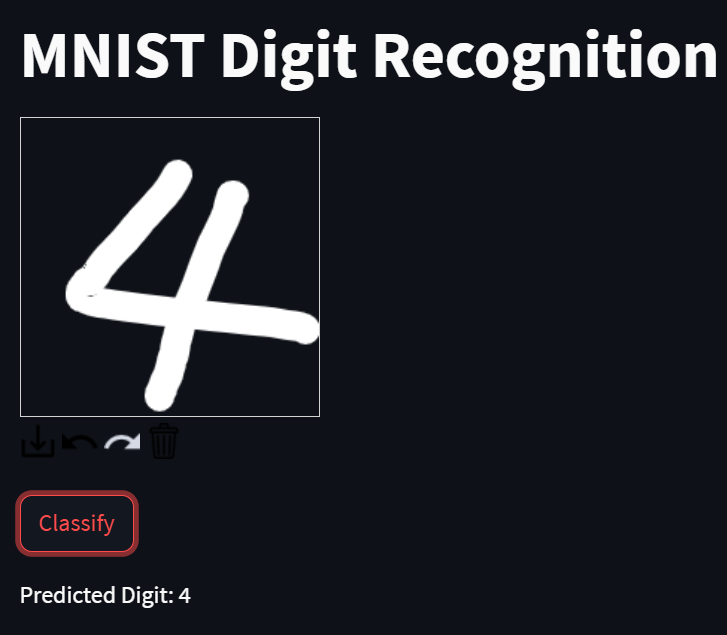

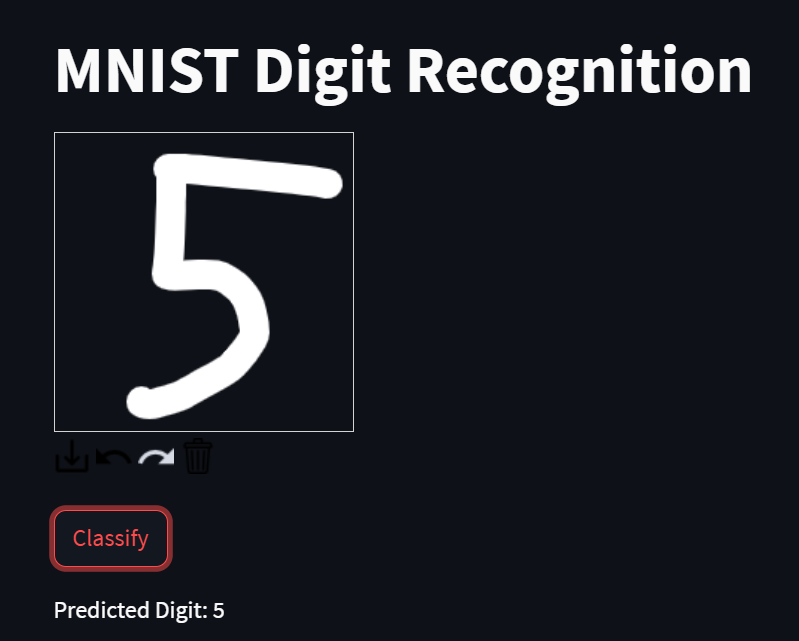

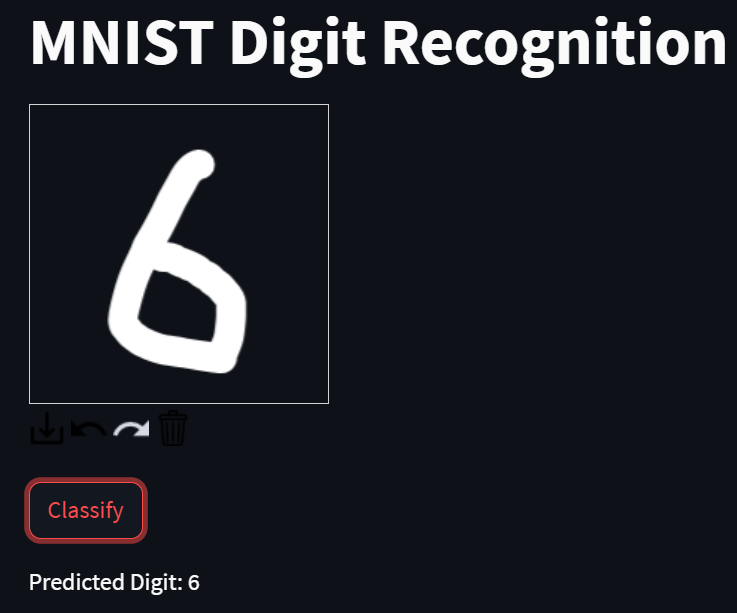

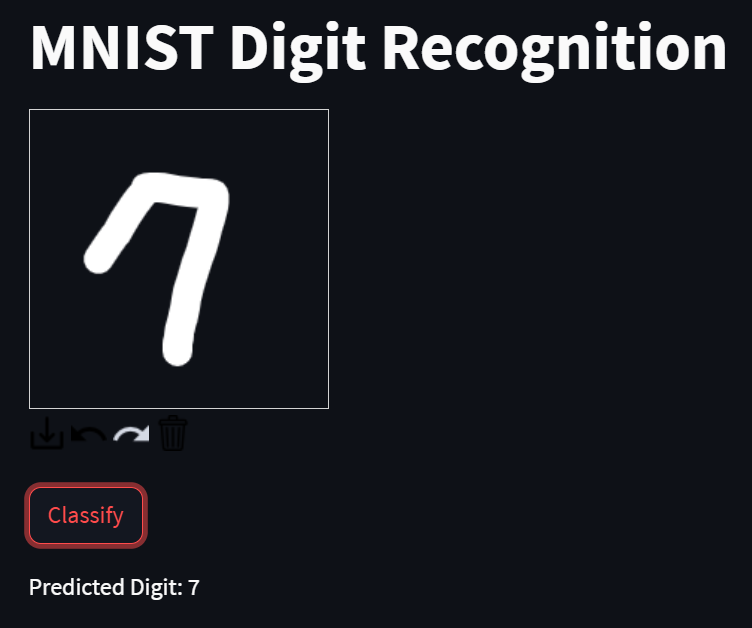

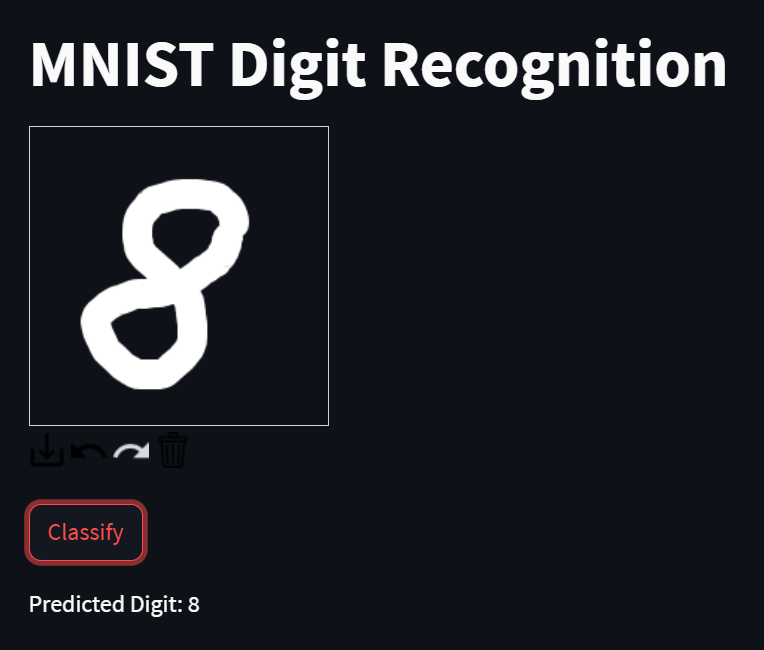

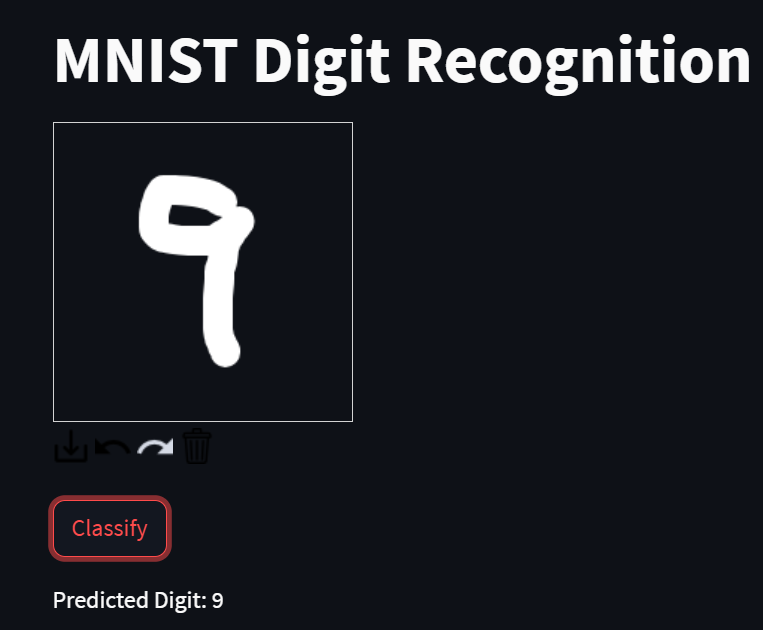